# Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
#lets load the data set in our system 
#for predict the Number of Wins(W).

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Attribute Information:

    1.R – Runs scored: number of times a player crosses home plate.
    
    2.AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
    
    3.H – Hit: reaching base because of a batted, fair ball without error by the defense.
    
    4.2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
    
    5.3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
    
    6.HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
    
    7.BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
    
    8.PA/SO – Plate appearances per strikeout: number of times a batter strikes out to their plate appearance
    
    9.SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
    
    10.RA – Run average: number of runs allowed times nine divided by innings pitched
    
    11.ER – Earned run: number of runs that did not occur as a result of errors or passed balls
    
    12.ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
    
    13.CG – Complete game: number of games where player was the only pitcher for their team
    
    14.SHO – Shutout: number of complete games pitched with no runs allowed
    
    15.SV – Save: number of games where the pitcher enters a game led by the pitcher's 
       team, finishes the game without surrendering the lead, is not the winning pitcher,
       and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings   
       
    16.E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result   
        

In [4]:
#Here we can easily se that W attibute defines the wins and also the output variable.
#and rest of the variables are input variables.

# EDA Process:
In choosing the right features to feed into our model, we want to capture the input variables most strongly related to the target variable. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


observations:

    1.from above code we can easily find that there is no nan values are fresent in dataset.

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

observations:
    
    1.from above code we find that major variables are integer and ERA is only the float data type.

In [7]:
df.shape

(30, 17)

observations:
1. 30rows and 17 columns are present in dataset

# Univariate analysis

Univariate analysis is the simplest form of analyzing data. 

#lets start with Distribution ploting.

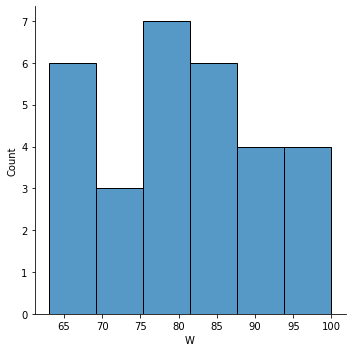

In [8]:
sns.displot(df['W'])

observations:

    1.from above ploting we can find that major data distribution is from 75-100.

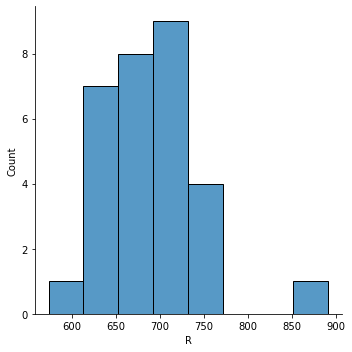

In [9]:
sns.displot(df['R'])

observations:

    1.from above ploting we can find that major data distribution is from 630-750.

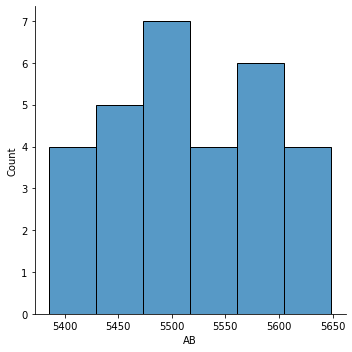

In [10]:
sns.displot(df["AB"])

observations:

    1.from above ploting we can find that data is distributed normally.

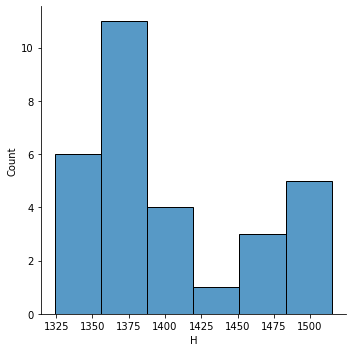

In [11]:
sns.displot(df['H'])

observations:

    1.from above ploting we can find that data not distributed normally,hence data is skewed.

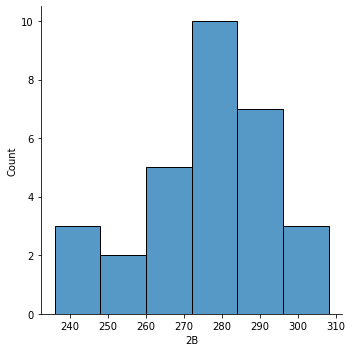

In [12]:
sns.displot(df['2B'])

observations:

    1.from above ploting we can find that data is not distributed normally.
    2.major data is in range from 270-300.

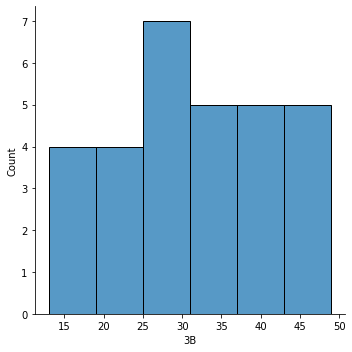

In [13]:
sns.displot(df['3B'])

observations:

    1.from above ploting we can find that data is distributed normally.

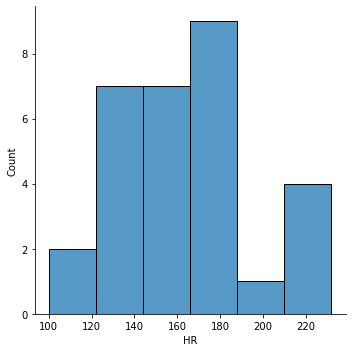

In [14]:
sns.displot(df['HR'])

observations:

    1.from above ploting we can find that data is distributed normally.

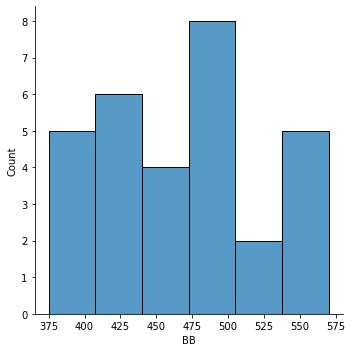

In [15]:
sns.displot(df['BB'])

observations:

    1.from above ploting we can find that data is distributed normally.

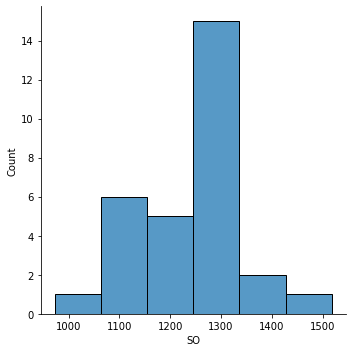

In [16]:
sns.displot(df['SO'])

observations:

    1.from above ploting we can find that data is not distributed normally.
    2. major data is between 1100-1400 range.

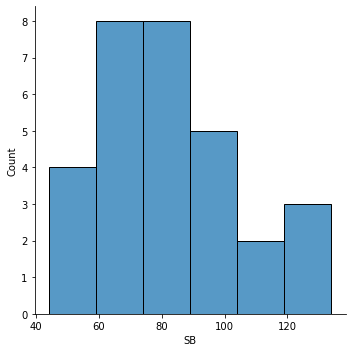

In [17]:
sns.displot(df['SB'])

observations:

    1.from above ploting we can find that data is distributed normally.

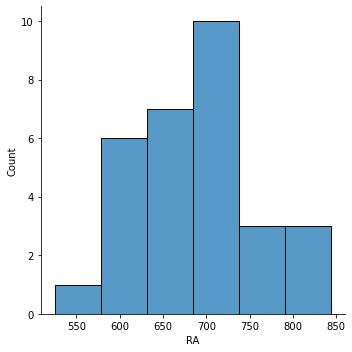

In [18]:
sns.displot(df['RA'])

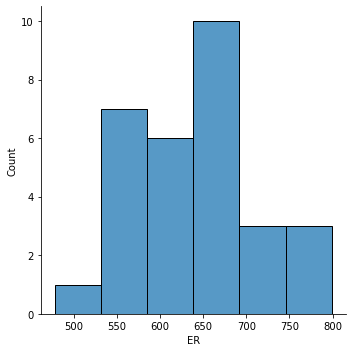

In [19]:
sns.displot(df['ER'])

observations:

    1.from above ploting we can find that data is not distributed normally.
   

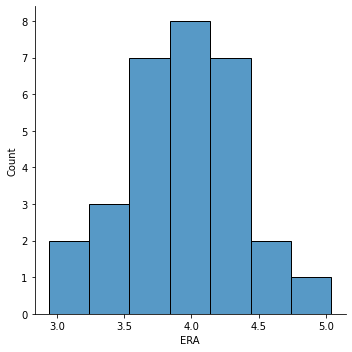

In [20]:
sns.displot(df['ERA'])

observations:

    1.from above ploting we can find that data is distributed normally.

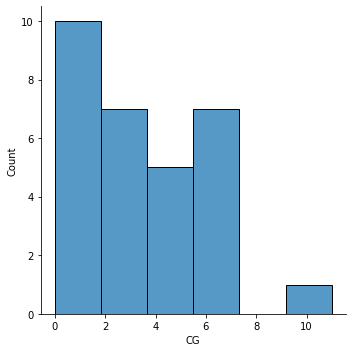

In [21]:
sns.displot(df["CG"])

observations:

    1.from above ploting we can find that data is not distributed normally.
    2. Major data is fall between 0-7.

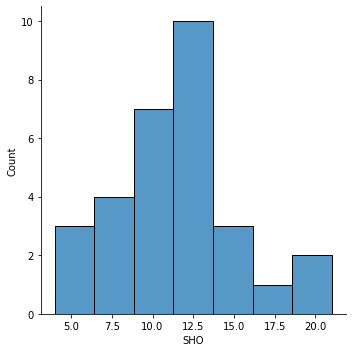

In [22]:
sns.displot(df['SHO'])

observations:

    1.from above ploting we can find that data is distributed normally.

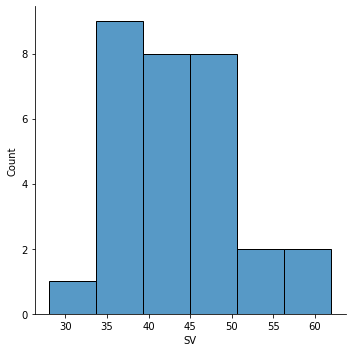

In [23]:
sns.displot(df['SV'])

observations:

    1.from above ploting we can find that data is distributed normally.

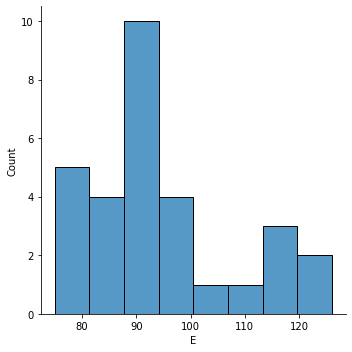

In [24]:
sns.displot(df['E'])

observations:

    1.from above ploting we can find that data is not distributed normally.

# Multivariate Analysis
Multivariate analysis is a set of techniques used for analysis of data sets that contain more than one variable

#lets plotting Regression plots with target variables.

# Regplot : This method is used to plot data and a linear regression model fit.

<AxesSubplot:xlabel='W', ylabel='R'>

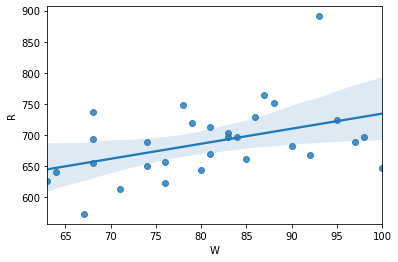

In [25]:
sns.regplot(y="R",x= "W",data=df)

from above observation:

1. Wins (W) increases with increases in Runs Scored.

<AxesSubplot:xlabel='W', ylabel='AB'>

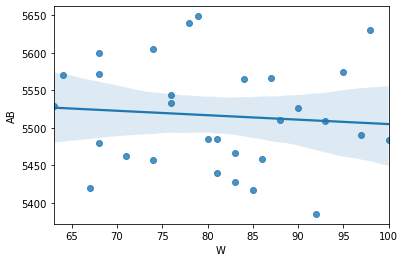

In [26]:
sns.regplot(y="AB",x= "W",data=df)

observations:

    1.from above ploting we can find that W is not much getting impact from AB .

#AB – At bat: plate appearances, not including bases on balls, being hit by pitch,
sacrifices, interference, or obstruction.

<AxesSubplot:xlabel='W', ylabel='H'>

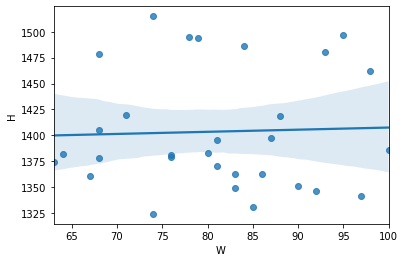

In [27]:
sns.regplot(y="H",x= "W",data=df)

observations:

    1.from above ploting we can find that W is not much getting impact from H or there is neutral impact. .

<AxesSubplot:xlabel='W', ylabel='2B'>

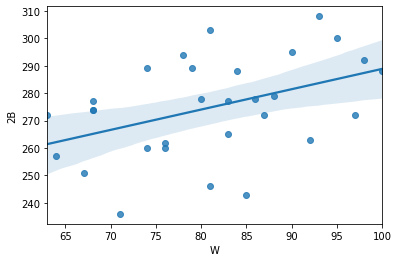

In [28]:
sns.regplot(y="2B",x= "W",data=df)

observations:

    1.from above ploting we can find that W is getting impact from 2B .

<AxesSubplot:xlabel='W', ylabel='3B'>

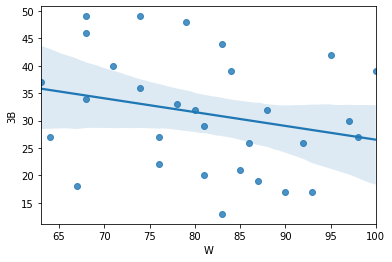

In [29]:
sns.regplot(y="3B",x= "W",data=df)

observations:

    1.from above ploting we can find that W is not directly proportional to 3B.
    2. as 3B decrease w increase.

<AxesSubplot:xlabel='W', ylabel='HR'>

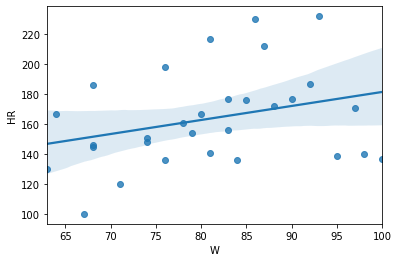

In [30]:
sns.regplot(y="HR",x= "W",data=df)

observations:

    1.from above ploting we can find that W is directly proportional to HR.

<AxesSubplot:xlabel='W', ylabel='BB'>

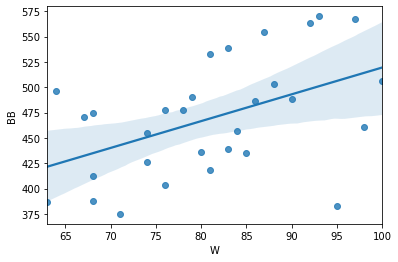

In [31]:
sns.regplot(y="BB",x= "W",data=df)

observations:

    1.from above ploting we can find that W is directly proportional to BB .

<AxesSubplot:xlabel='W', ylabel='SO'>

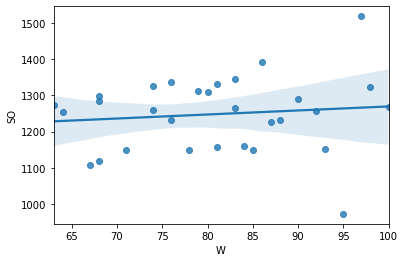

In [32]:
sns.regplot(y="SO",x= "W",data=df)

observations:

    1.from above ploting we can find that W is directly proportional to SO .

<AxesSubplot:xlabel='W', ylabel='SB'>

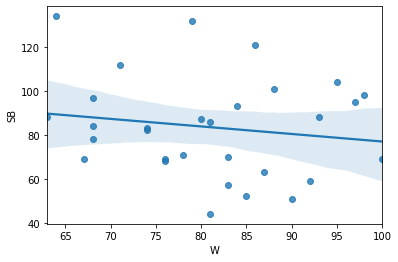

In [33]:
sns.regplot(y="SB",x= "W",data=df)

observations:

    1.from above ploting we can find that W is increase with decrease in SB. .

<AxesSubplot:xlabel='W', ylabel='RA'>

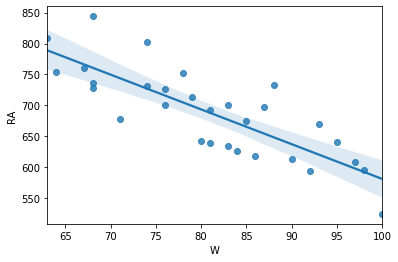

In [34]:
sns.regplot(y="RA",x= "W",data=df)

observations:

    1.from above ploting we can find that W is increase with decrease in RA .

<AxesSubplot:xlabel='W', ylabel='ER'>

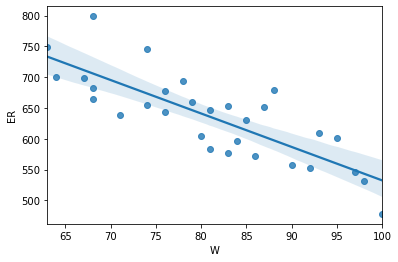

In [35]:
sns.regplot(y="ER",x= "W",data=df)

observations:

    1.from above ploting we can find that W is increase with decrease in ER .

<AxesSubplot:xlabel='W', ylabel='ERA'>

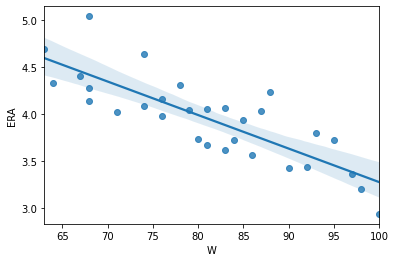

In [36]:
sns.regplot(y="ERA",x= "W",data=df)

observations:

    1.from above ploting we can find that W is increase with decrease in ERA .

<AxesSubplot:xlabel='W', ylabel='SHO'>

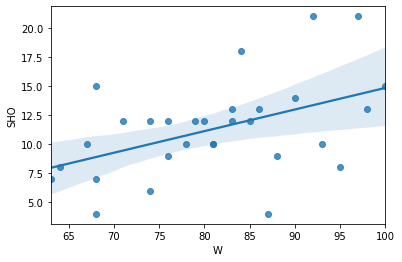

In [37]:
sns.regplot(y="SHO",x= "W",data=df)

observations:

    1.from above ploting we can find that W is increase with increase  in SHO .

<AxesSubplot:xlabel='W', ylabel='SV'>

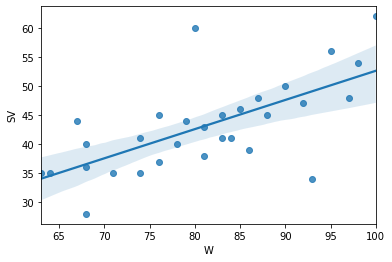

In [38]:
sns.regplot(y="SV",x= "W",data=df)

observations:

    1.from above ploting we can find that W is increase with increase in SV .

<AxesSubplot:xlabel='W', ylabel='E'>

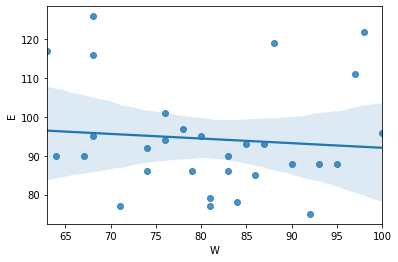

In [39]:
sns.regplot(y="E",x= "W",data=df)

observations:

    1.from above ploting we can find that W is increase with decrease in E .

# CORRELATION BETWEEN THE COLUMNS:

In [40]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


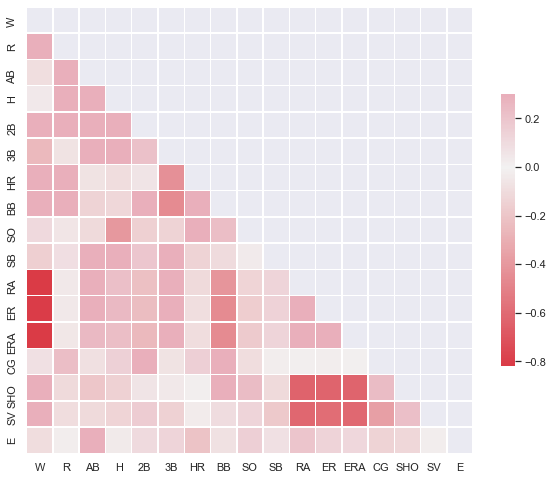

In [41]:
import matplotlib.pyplot as plt
import numpy as np
correlations = df.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(10, 5, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

light color represents good or positive relation where as dark red box represents bad or negative corelation wit target column.

observations:
    1.ERA,ER,RA are having collinearity.

<AxesSubplot:>

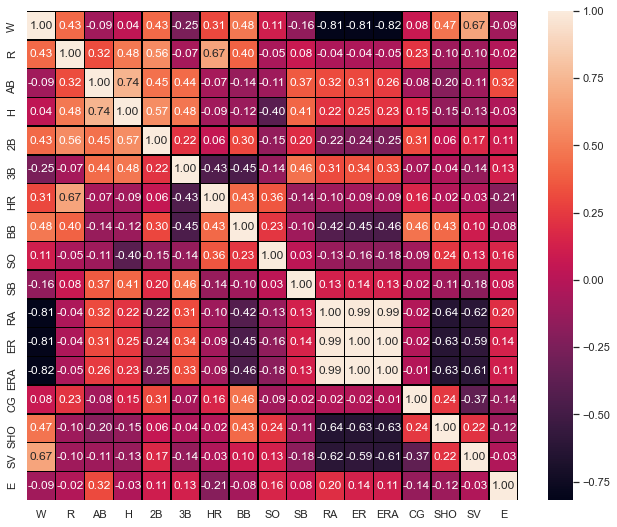

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

# Correlation: From the above result it is clear that some columns making positive correlation and some making negative correlation.


Positive correlation columns are:

1.R

2.H

3.2B

4.HR

5.BB

6.SO

7.CG

8.SHO

9.SV


Negative correlation columns are:

1.AB

2.3B

3.SB

4.RA

5.ER

6.ERA

7.E

The positively correlated columns has a great impact on the target column while the negative correlated has less or zero impact on the target column.

# Discription of dataset

In [43]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


PLOTTING THE DISCRIPTION OF DATASET

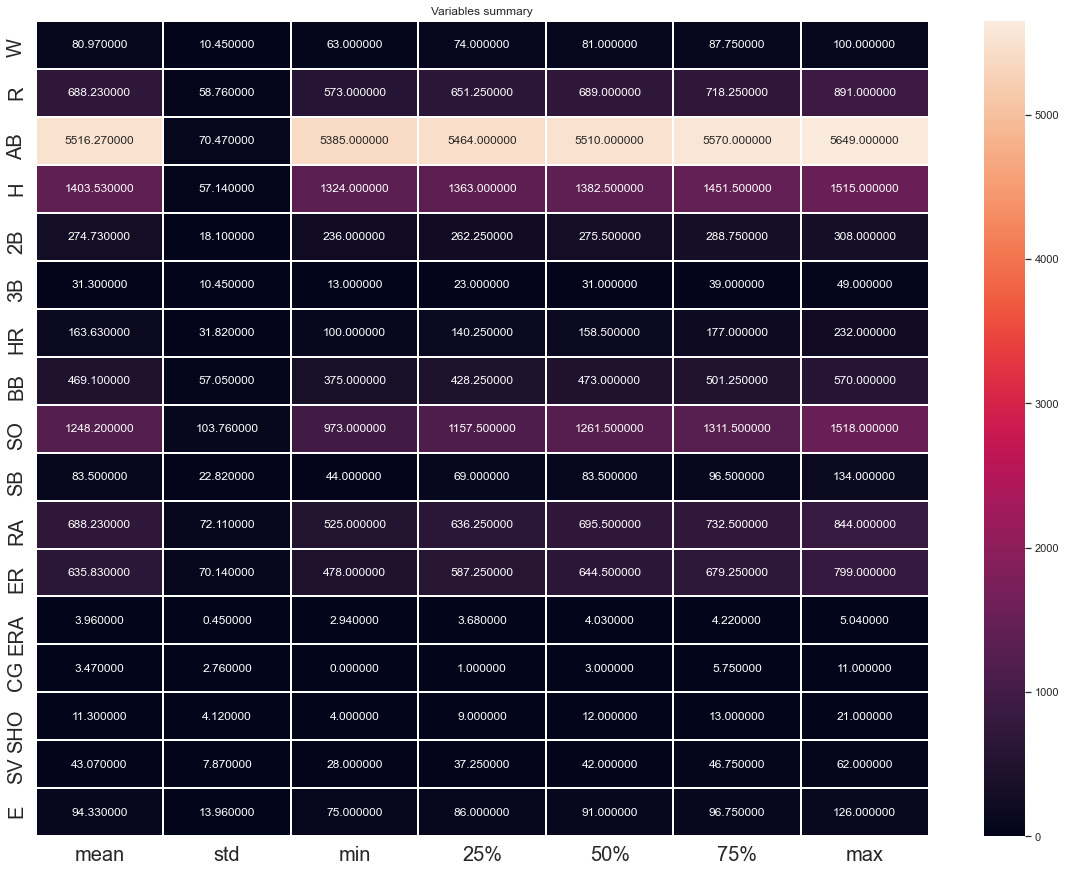

In [44]:
plt.figure(figsize=(20,15))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Variables summary")
plt.show()


# Principal component analysis
Principal component analysis (PCA) is the process of computing the principal components.
and cheak the collinearity.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
x=df.iloc[:,1:]
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [47]:
x.shape

(30, 16)

In [48]:
x.shape[1]

16

In [49]:
y=df.iloc[:,0]
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [50]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [51]:
vif_calc()

      VIF Factor features
0    1638.985029        R
1    4277.157018       AB
2    4698.798408        H
3     904.439835       2B
4      32.435486       3B
5     285.773237       HR
6     269.485018       BB
7     398.234104       SO
8      28.654970       SB
9   17204.829356       RA
10  49837.289228       ER
11  23551.544014      ERA
12      6.771036       CG
13     30.276598      SHO
14    119.686080       SV
15     94.215202        E


Observations:

R,AB,H are highy corelated
and
RA,ER,ERA are highly corelated

#lets cheak out that which variable impacting more on wins.
R=.43
AB=-0.09
h=0.04

and
RA= -.81
ER= -.81
ERA= -.82


from above observations
we can easily drop AB,H,ER,ERA

In [52]:
df.drop(['AB','H','ER','ERA'],axis=1,inplace=True)

In [53]:
df

,W,R,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,724,300,42,139,383,973,104,641,2,8,56,88
1,83,696,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,289,49,151,455,1259,83,803,7,12,35,86
5,93,891,308,17,232,570,1151,88,670,7,10,34,88
6,87,764,272,19,212,554,1227,63,698,3,4,48,93
7,81,713,246,20,217,418,1331,44,693,0,10,43,77
8,80,644,278,32,167,436,1310,87,642,1,12,60,95
9,78,748,294,33,161,478,1148,71,753,3,10,40,97


# Now use subplot and displot to check data are normalised or not.

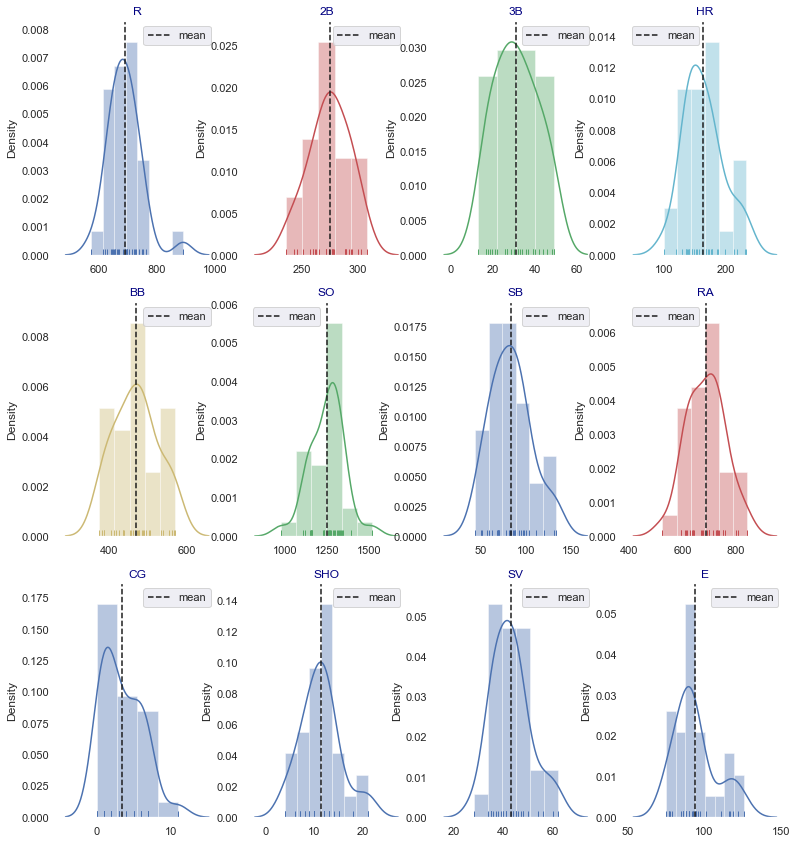

In [54]:
import itertools

cols = ['R', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA',
        'CG', 'SHO', 'SV', 'E']
length = len(cols)
cs = ["b","r","g","c","y","g","b","r"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(5,4,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observations:
    1. some data is normally distributed and some are not.

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>,
        <AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>],
       [<AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>],
       [<AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

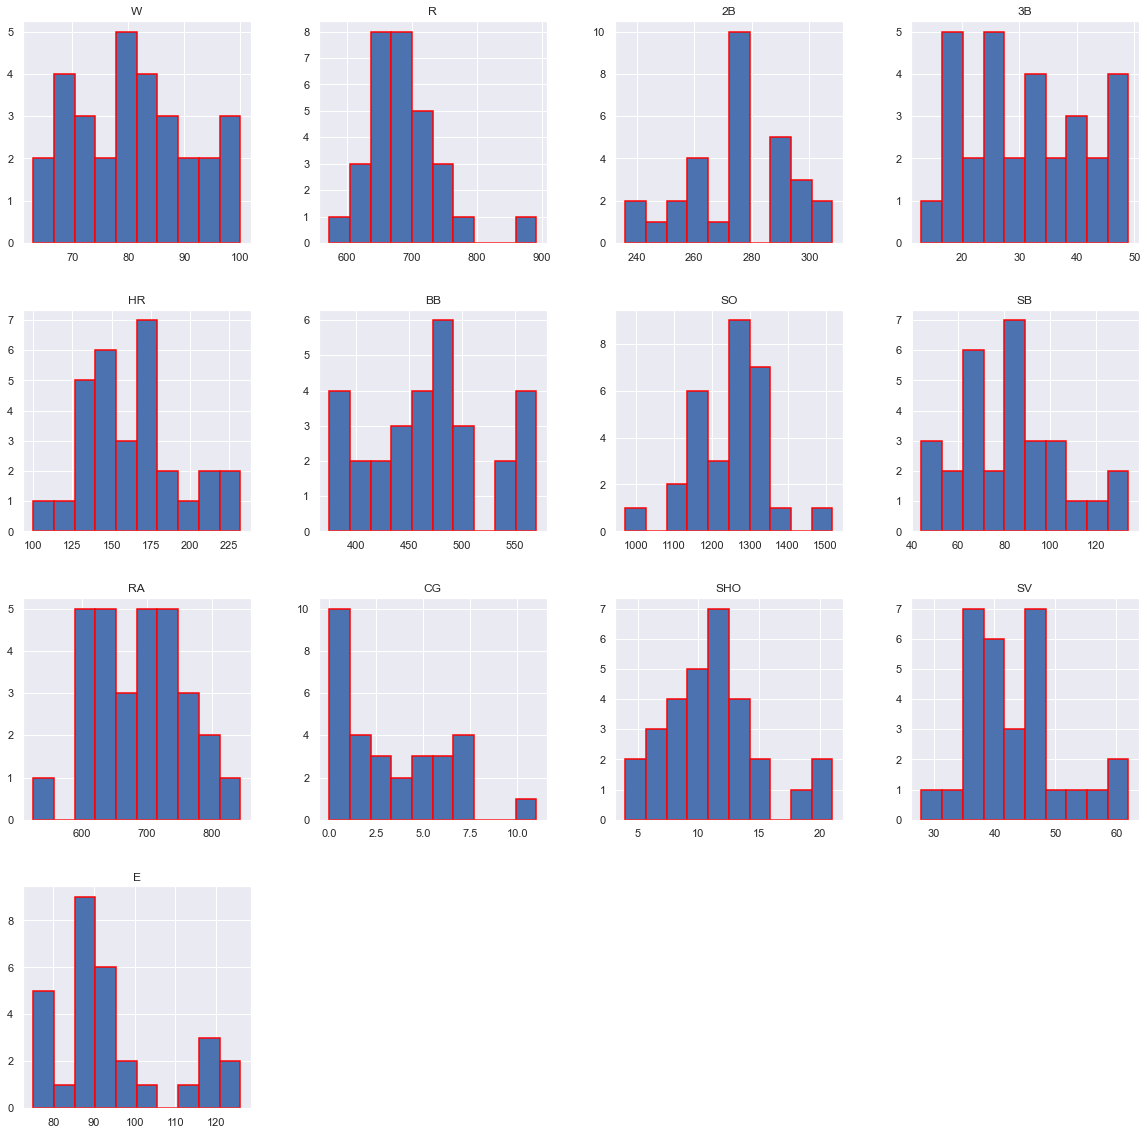

In [55]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

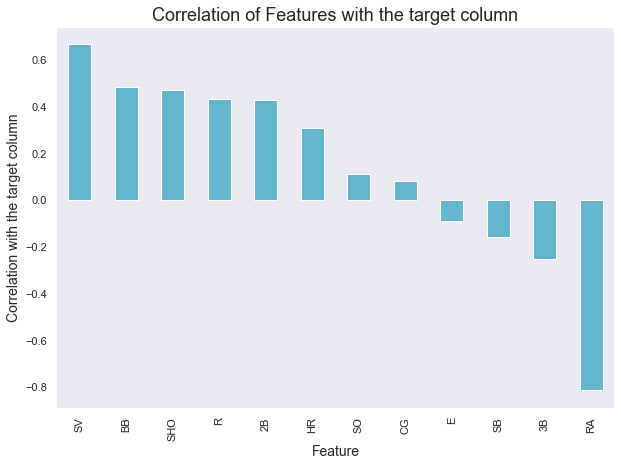

In [56]:
plt.figure(figsize=(10,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


observations:
    1.sv making very good relation with target column.
    2. RA having bad relation with target column

# Skeness in columns

In [57]:
df.skew()

W      0.047089
R      1.200786
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

observations:
    data is not much skewed.

# Detecting outliers

<AxesSubplot:>

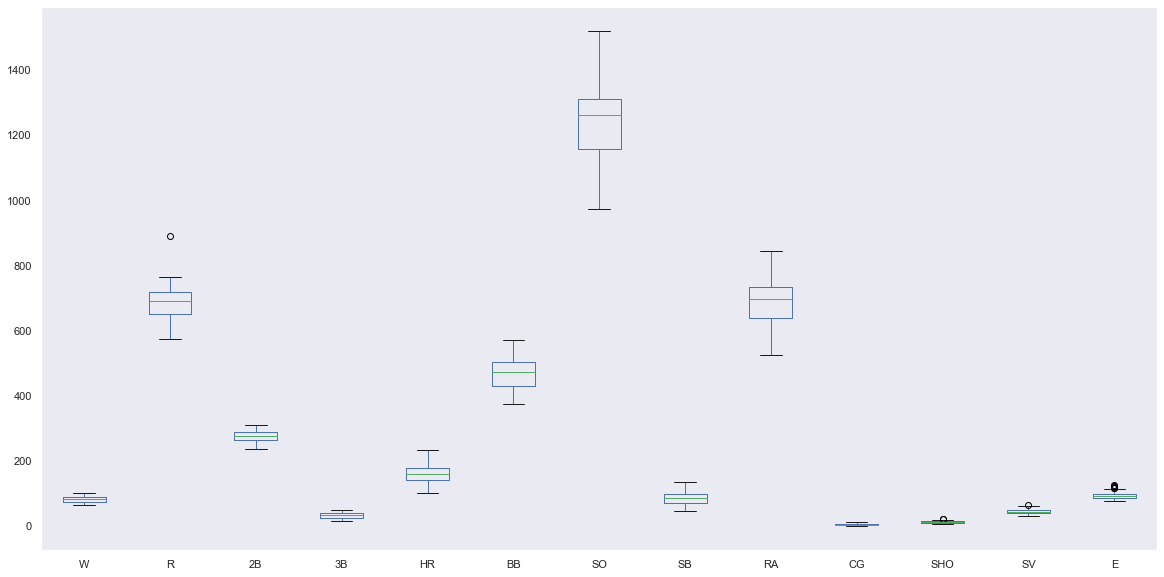

In [58]:
df.plot.box(figsize=(20,10))

observations:
    

    1.Data set having not much outliers.
    2.E,R,sv having some outliers

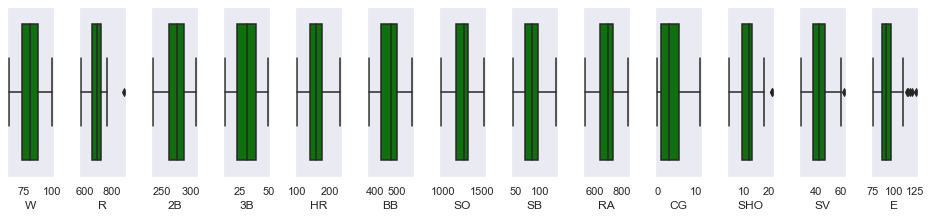

In [59]:
collist=df.columns.values
ncol=30
nrows=30
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+5)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


# Check the percentage of data falls under outliers:

In [60]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [61]:
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,724,300,42,139,383,973,104,641,2,8,56,88
1,83,696,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,289,49,151,455,1259,83,803,7,12,35,86
6,87,764,272,19,212,554,1227,63,698,3,4,48,93
7,81,713,246,20,217,418,1331,44,693,0,10,43,77
8,80,644,278,32,167,436,1310,87,642,1,12,60,95
9,78,748,294,33,161,478,1148,71,753,3,10,40,97
10,88,751,279,32,172,503,1233,101,733,5,9,45,119


In [62]:
df.shape

(30, 13)

In [63]:
df_new.shape

(29, 13)

In [64]:
percentage_loss=((30-29)/30)*100
print(percentage_loss)

3.3333333333333335


observations:

    1.The data loss is 3.33 percentile,which is under 10%  so we go for further data cleaning.       2.understands that some outliers are present.

In [65]:
df_new.shape

(29, 13)

In [66]:
x=df_new.iloc[:,1:]
x

,R,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,724,300,42,139,383,973,104,641,2,8,56,88
1,696,277,44,156,439,1264,70,700,2,12,45,86
2,669,303,29,141,533,1157,86,640,11,10,38,79
3,622,260,27,136,404,1231,68,701,7,9,37,101
4,689,289,49,151,455,1259,83,803,7,12,35,86
6,764,272,19,212,554,1227,63,698,3,4,48,93
7,713,246,20,217,418,1331,44,693,0,10,43,77
8,644,278,32,167,436,1310,87,642,1,12,60,95
9,748,294,33,161,478,1148,71,753,3,10,40,97
10,751,279,32,172,503,1233,101,733,5,9,45,119


In [67]:
y=df_new.iloc[:,0]
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

# Removing skewness by transforming data.

In [68]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 9.62543504e-01,  1.68518793e+00,  1.00615029e+00,
        -7.41927000e-01, -1.60519802e+00, -2.55061247e+00,
         9.36131648e-01, -6.60978697e-01, -3.07098204e-01,
        -7.87002186e-01,  1.53275292e+00, -3.48265262e-01],
       [ 2.98863300e-01,  1.38197902e-01,  1.18522654e+00,
        -1.09958425e-01, -4.62095966e-01,  9.36832915e-02,
        -5.16377335e-01,  1.60225829e-01, -3.07098204e-01,
         2.36736538e-01,  3.12020186e-01, -5.40819806e-01],
       [-3.12105130e-01,  1.90738550e+00, -2.28819392e-01,
        -6.64354121e-01,  1.23209786e+00, -9.35611465e-01,
         2.25038365e-01, -6.74967476e-01,  2.01131531e+00,
        -2.52844176e-01, -6.64136739e-01, -1.32612477e+00],
       [-1.30829774e+00, -8.37664770e-01, -4.32227907e-01,
        -8.60039342e-01, -1.16272085e+00, -2.30682707e-01,
        -6.18421529e-01,  1.74076810e-01,  1.26446344e+00,
        -5.13554932e-01, -8.20688859e-01,  6.50818351e-01],
       [ 1.37737301e-01,  9.11434794e-01,  1.6226359

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 9.62543504e-01,  1.68518793e+00,  1.00615029e+00,
        -7.41927000e-01, -1.60519802e+00, -2.55061247e+00,
         9.36131648e-01, -6.60978697e-01, -3.07098204e-01,
        -7.87002186e-01,  1.53275292e+00, -3.48265262e-01],
       [ 2.98863300e-01,  1.38197902e-01,  1.18522654e+00,
        -1.09958425e-01, -4.62095966e-01,  9.36832915e-02,
        -5.16377335e-01,  1.60225829e-01, -3.07098204e-01,
         2.36736538e-01,  3.12020186e-01, -5.40819806e-01],
       [-3.12105130e-01,  1.90738550e+00, -2.28819392e-01,
        -6.64354121e-01,  1.23209786e+00, -9.35611465e-01,
         2.25038365e-01, -6.74967476e-01,  2.01131531e+00,
        -2.52844176e-01, -6.64136739e-01, -1.32612477e+00],
       [-1.30829774e+00, -8.37664770e-01, -4.32227907e-01,
        -8.60039342e-01, -1.16272085e+00, -2.30682707e-01,
        -6.18421529e-01,  1.74076810e-01,  1.26446344e+00,
        -5.13554932e-01, -8.20688859e-01,  6.50818351e-01],
       [ 1.37737301e-01,  9.11434794e-01,  1.6226359

# Since the target column has continous data type we will use Linear Regression model.

# Regressor Model Building:
Linear Regression:

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [71]:
`max_scr=0
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
        print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

SyntaxError: invalid syntax (<ipython-input-71-980b0d23e352>, line 1)

In [72]:
from sklearn.model_selection import cross_val_score
for i in range(0,100):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    lr.score(xtrain,ytrain)
    #if round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2):
    print("At random state",i," The model performs very well")
    print("At random_state:-",i)
    print(lr.fit(xtrain,ytrain))
    print(lr.score(xtrain,ytrain))
    pred_train=lr.predict(xtrain)

    pred_test=lr.predict(xtest)

    
r2_score(ytest,pred_test)


At random state 0  The model performs very well
At random_state:- 0
LinearRegression()
0.9619550579591248
At random state 1  The model performs very well
At random_state:- 1
LinearRegression()
0.9456895188547703
At random state 2  The model performs very well
At random_state:- 2
LinearRegression()
0.9340600802773126
At random state 3  The model performs very well
At random_state:- 3
LinearRegression()
0.9301141109134496
At random state 4  The model performs very well
At random_state:- 4
LinearRegression()
0.9435405189726664
At random state 5  The model performs very well
At random_state:- 5
LinearRegression()
0.9408245532838578
At random state 6  The model performs very well
At random_state:- 6
LinearRegression()
0.9105165988369499
At random state 7  The model performs very well
At random_state:- 7
LinearRegression()
0.9430096010140441
At random state 8  The model performs very well
At random_state:- 8
LinearRegression()
0.9618284778770276
At random state 9  The model performs very wel

0.894631497347182

In [73]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=75)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)
pred_train=lr.predict(xtrain)

pred_test=lr.predict(xtest)

    
print(r2_score(ytest,pred_test))
print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)


0.9321945078346161
Training r2_score is:- 91.28813591198644
Testing r2_score is:- 93.21945078346161


In [74]:
print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

Training r2_score is:- 91.28813591198644
Testing r2_score is:- 93.21945078346161


In [75]:
lrs = r2_score(ytest,pred_test)
for j in range(2,10):
        lrscore = cross_val_score(lr,x,y,cv=j)
        lrc = lrscore.mean() 
        print("At cv:-",j)
        print("Cross validation score is:-",lrc*100 )
        print("R2_score is :-",lrs*100)
        print("\n")


from sklearn.metrics import accuracy_score

At cv:- 2
Cross validation score is:- -15.901606521082973
R2_score is :- 93.21945078346161


At cv:- 3
Cross validation score is:- 19.884620446133525
R2_score is :- 93.21945078346161


At cv:- 4
Cross validation score is:- 45.97723278742433
R2_score is :- 93.21945078346161


At cv:- 5
Cross validation score is:- 35.913914739125175
R2_score is :- 93.21945078346161


At cv:- 6
Cross validation score is:- 32.73017077195923
R2_score is :- 93.21945078346161


At cv:- 7
Cross validation score is:- 23.72513001307349
R2_score is :- 93.21945078346161


At cv:- 8
Cross validation score is:- 40.1944675421706
R2_score is :- 93.21945078346161


At cv:- 9
Cross validation score is:- -510.3590271160213
R2_score is :- 93.21945078346161




At cv:- 4
Cross validation score is:- 45.97723278742441
R2_score is :- 93.21945078346164


In [76]:
xtrain.shape

(23, 12)

In [77]:
ytrain.shape

(23,)

In [78]:
xtest.shape

(6, 12)

In [79]:
ytest.shape

(6,)

In [80]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

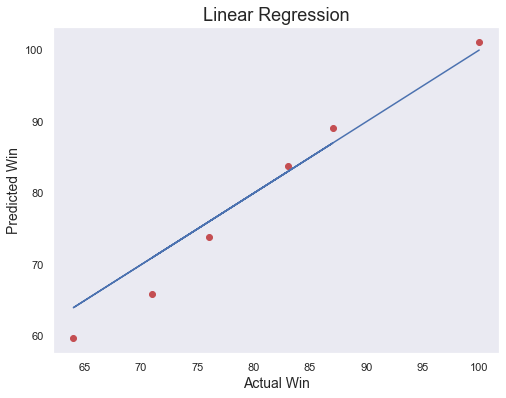

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_test, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Win',fontsize=14)
plt.ylabel('Predicted Win',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regurlarization
As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

1. Lasso

In [82]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [83]:

ls = Lasso(alpha=1,random_state=75)
print(ls.fit(xtrain,ytrain))
print(ls.score(xtrain,ytrain))
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

Lasso(alpha=1, random_state=75)
0.8569484362466421
At cv:- 2
Cross validation score is:- 66.06866116531312
R2_score is :- 92.16206706388459


At cv:- 3
Cross validation score is:- 63.787288463528455
R2_score is :- 92.16206706388459


At cv:- 4
Cross validation score is:- 75.31384350380506
R2_score is :- 92.16206706388459


At cv:- 5
Cross validation score is:- 46.712690252871234
R2_score is :- 92.16206706388459


At cv:- 6
Cross validation score is:- 56.256620218982015
R2_score is :- 92.16206706388459


At cv:- 7
Cross validation score is:- 40.753435916185055
R2_score is :- 92.16206706388459


At cv:- 8
Cross validation score is:- 51.74030860370775
R2_score is :- 92.16206706388459


At cv:- 9
Cross validation score is:- -437.66300326675093
R2_score is :- 92.16206706388459




At cv:- 4
Cross validation score is:- 75.31384350380506
R2_score is :- 92.16206706388459


In [84]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [85]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ls))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ls)))

Error:
Mean Absolute Error: 2.848317481559062
Mean Squared Error: 10.592095481722627
Root Mean Square Error: 3.254549966081736


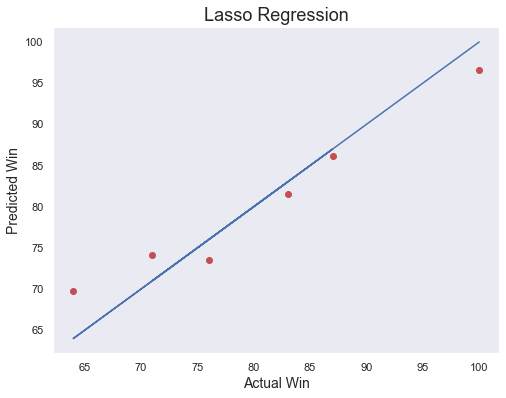

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ls, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Win',fontsize=14)
plt.ylabel('Predicted Win',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge

In [87]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [88]:
rd = Ridge(alpha=0.1, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)
pred_rd = rd.predict(xtest)
rds = r2_score(ytest,pred_rd)
for j in range(2,10):
    rds = r2_score(ytest,pred_rd)
    
    print("At cv:-",j)
    print('R2 Score:',rds*100)

    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)

At cv:- 2
R2 Score: 94.07505578566887
Cross Val Score: 62.24844967985693
At cv:- 3
R2 Score: 94.07505578566887
Cross Val Score: 47.27137221662902
At cv:- 4
R2 Score: 94.07505578566887
Cross Val Score: 63.97423569357152
At cv:- 5
R2 Score: 94.07505578566887
Cross Val Score: 38.77362069816015
At cv:- 6
R2 Score: 94.07505578566887
Cross Val Score: 41.07589843314905
At cv:- 7
R2 Score: 94.07505578566887
Cross Val Score: 27.4745238247786
At cv:- 8
R2 Score: 94.07505578566887
Cross Val Score: 44.44592414455135
At cv:- 9
R2 Score: 94.07505578566887
Cross Val Score: -779.8992005474336


At cv:- 4
R2 Score: 94.07505578566887
Cross Val Score: 63.97423569357152

In [89]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rd)))

Error:
Mean Absolute Error: 2.4906133428226056
Mean Squared Error: 8.006903778533617
Root Mean Square Error: 2.8296472887152593


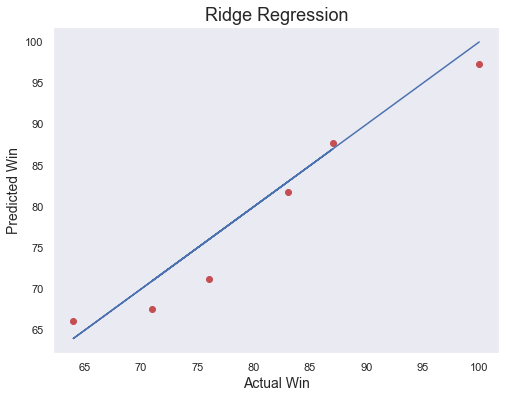

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Win',fontsize=14)
plt.ylabel('Predicted Win',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:
Decision Tree Regressor

In [91]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'splitter': 'best'}


In [92]:
dt = DecisionTreeRegressor(criterion='mae', splitter='best',max_features= 'sqrt')
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)
pred_decision = dt.predict(xtest)

dts = r2_score(ytest,pred_decision)
for j in range(2,10):
    print("At cv:-",j)
    dts = r2_score(ytest,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)

At cv:- 2
R2 Score: -54.40904419321686
Cross Val Score: -49.177357321853755
At cv:- 3
R2 Score: -54.40904419321686
Cross Val Score: -25.66385466811058
At cv:- 4
R2 Score: -54.40904419321686
Cross Val Score: -89.14993906131453
At cv:- 5
R2 Score: -54.40904419321686
Cross Val Score: -204.3190177320576
At cv:- 6
R2 Score: -54.40904419321686
Cross Val Score: -251.6496157440541
At cv:- 7
R2 Score: -54.40904419321686
Cross Val Score: -214.59805251812801
At cv:- 8
R2 Score: -54.40904419321686
Cross Val Score: -175.42985225694258
At cv:- 9
R2 Score: -54.40904419321686
Cross Val Score: -1144.0068175465199


At cv:- 2
R2 Score: 51.77800616649537
Cross Val Score: 29.466250867053322

In [93]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_decision))
print('Mean Squared Error:',mean_squared_error(ytest,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_decision)))


Error:
Mean Absolute Error: 11.666666666666666
Mean Squared Error: 208.66666666666666
Root Mean Square Error: 14.445299120013633


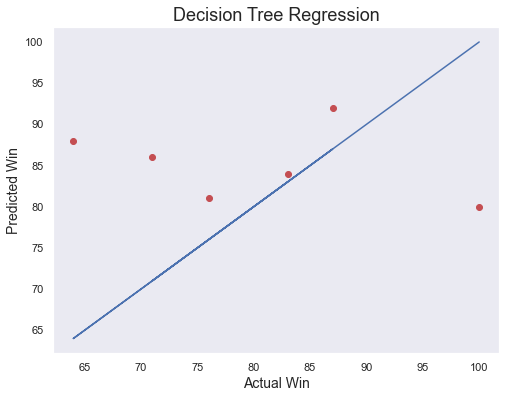

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_decision, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Win',fontsize=14)
plt.ylabel('Predicted Win',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# RandomForestRegressor

In [95]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300],'max_features':['auto', 'sqrt', 'log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'auto', 'n_estimators': 300}


In [96]:
rf = RandomForestRegressor(criterion='mae',n_estimators=100, max_features= 'log2')
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_random = rf.predict(xtest)
rfs = r2_score(ytest,pred_random)
for j in range(2,10):
    print("At cv:-",j)

    rfs = r2_score(ytest,pred_random)
    print('R2 Score:',rfs*100)

    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print('Cross Val Score:',rfc*100)

At cv:- 2
R2 Score: 51.24311202466596
Cross Val Score: 6.2404462769220626
At cv:- 3
R2 Score: 51.24311202466596
Cross Val Score: 14.666699937342168
At cv:- 4
R2 Score: 51.24311202466596
Cross Val Score: 39.989064151391815
At cv:- 5
R2 Score: 51.24311202466596
Cross Val Score: -8.122152092359944
At cv:- 6
R2 Score: 51.24311202466596
Cross Val Score: 13.229676172616506
At cv:- 7
R2 Score: 51.24311202466596
Cross Val Score: 12.054724334444348
At cv:- 8
R2 Score: 51.24311202466596
Cross Val Score: 16.166476694449823
At cv:- 9
R2 Score: 51.24311202466596
Cross Val Score: -1542.3461299749729


At cv:- 4
R2 Score: 51.24473997944503
Cross Val Score: 46.88245468728078

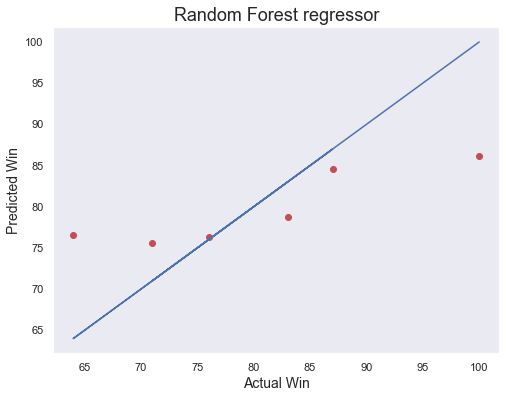

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Win',fontsize=14)
plt.ylabel('Predicted Win',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

# Gradient Boosting Regressor

In [98]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'loss': 'lad', 'n_estimators': 200}


In [99]:
gbr= GradientBoostingRegressor(criterion='mse',loss='lad',n_estimators=200)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_gradient = gbr.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)

    gbrs= r2_score(ytest,pred_gradient)
    print('R2 Score:',gbrs*100)

    gbscore = cross_val_score(gbr,x,y,cv=j)
    gbrc= gbscore.mean() 
    print('Cross Val Score:',gbrc*100)

At cv:- 2
R2 Score: 68.7796864799973
Cross Val Score: 14.420263912074393
At cv:- 3
R2 Score: 68.7796864799973
Cross Val Score: 11.331008233341052
At cv:- 4
R2 Score: 68.7796864799973
Cross Val Score: 45.583184401648296
At cv:- 5
R2 Score: 68.7796864799973
Cross Val Score: -60.291241493192636
At cv:- 6
R2 Score: 68.7796864799973
Cross Val Score: -35.60953655235019
At cv:- 7
R2 Score: 68.7796864799973
Cross Val Score: -24.724219157442498
At cv:- 8
R2 Score: 68.7796864799973
Cross Val Score: -29.309379441923657
At cv:- 9
R2 Score: 68.7796864799973
Cross Val Score: -1239.493402989029


At cv:- 4
R2 Score: 62.42433239357141
Cross Val Score: 49.114207044462646

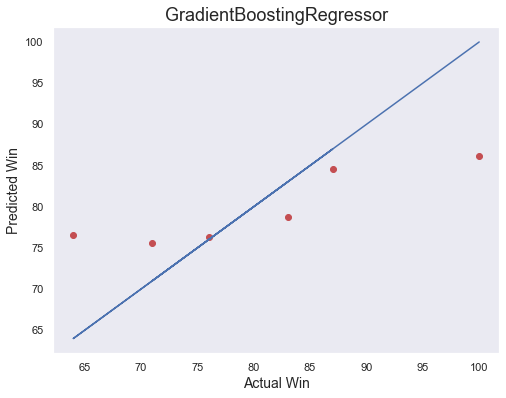

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_random, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Win',fontsize=14)
plt.ylabel('Predicted Win',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

# Support vector Regression

In [101]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid'] ,'gamma': ['auto', 'scale'],'cache_size':[50,100,200,300]}
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'auto', 'kernel': 'linear'}


In [102]:
sv = SVR(kernel = 'linear', gamma = 'auto',cache_size= 50)
sv.fit(xtrain,ytrain)
sv.score(xtrain,ytrain)
pred_vector = sv.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    svs = r2_score(ytest,pred_vector)
    print('R2 Score:',svs*100)

    svscore = cross_val_score(sv,x,y,cv=j)
    svc = svscore.mean() 
    print('Cross Val Score:',svc*100)

At cv:- 2
R2 Score: 91.24164073439381
Cross Val Score: 41.623361305923794
At cv:- 3
R2 Score: 91.24164073439381
Cross Val Score: 45.8731345435665
At cv:- 4
R2 Score: 91.24164073439381
Cross Val Score: 61.242675480230105
At cv:- 5
R2 Score: 91.24164073439381
Cross Val Score: 31.129016931196645
At cv:- 6
R2 Score: 91.24164073439381
Cross Val Score: 31.337059042321602
At cv:- 7
R2 Score: 91.24164073439381
Cross Val Score: 14.178513556995142
At cv:- 8
R2 Score: 91.24164073439381
Cross Val Score: 30.338927113975856
At cv:- 9
R2 Score: 91.24164073439381
Cross Val Score: -732.674668970338


At cv:- 4
R2 Score: 91.24164073439397
Cross Val Score: 61.24267548022972

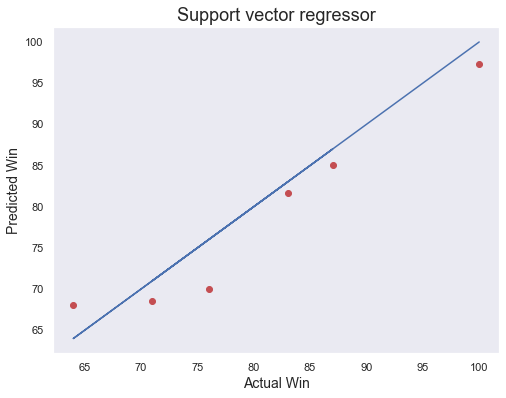

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_vector, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Win',fontsize=14)
plt.ylabel('Predicted Win',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


# KNeighborsRegressor

In [104]:
from sklearn.neighbors import KNeighborsRegressor

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}


In [105]:
kn = KNeighborsRegressor(algorithm = 'brute', weights = 'distance',n_neighbors=5)
kn.fit(xtrain,ytrain)
kn.score(xtrain,ytrain)
pred_k = kn.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    kns = r2_score(ytest,pred_k)
    print('R2 Score:',kns*100)

    knscore = cross_val_score(kn,x,y,cv=j)
    kvc = knscore.mean() 
    print('Cross Val Score:',kvc*2)

At cv:- 2
R2 Score: 68.56737062431972
Cross Val Score: 0.27996823165335405
At cv:- 3
R2 Score: 68.56737062431972
Cross Val Score: 0.44946498256402845
At cv:- 4
R2 Score: 68.56737062431972
Cross Val Score: 0.940943503841435
At cv:- 5
R2 Score: 68.56737062431972
Cross Val Score: -0.39810217364381006
At cv:- 6
R2 Score: 68.56737062431972
Cross Val Score: 0.03765116585175251
At cv:- 7
R2 Score: 68.56737062431972
Cross Val Score: -0.013801507577909497
At cv:- 8
R2 Score: 68.56737062431972
Cross Val Score: -0.11069451316435935
At cv:- 9
R2 Score: 68.56737062431972
Cross Val Score: -34.42492974527967


At cv:- 4
R2 Score: 68.56737062431972
Cross Val Score: 0.9409435038414354

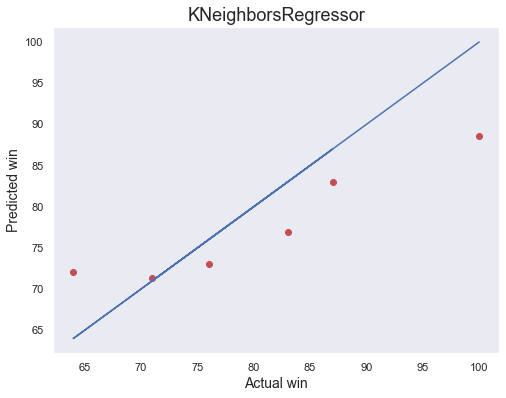

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_k, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual win',fontsize=14)
plt.ylabel('Predicted win',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()


In [107]:
#lets make a list of models and there result.
df1=pd.DataFrame()
df1['Models Tested']=['Linear Regression','Lasso Regression','Ridge Regresion','Decision Tree Regression',
                     'Random forest Regression','Gradient Boost Regression','Support vactor Regression','K-Neighbour Regression']
df1['Reult']=['At cv:- 4 R2_s is :- 93.21 Cvs is:- 45.97' ,
             'At cv:- 4 R2_s is :- 92.16 Cvs is:- 75.31 ',
             'At cv:- 4 R2 Score: 94.07 Cvs: 63.97',
             'At cv:- 2 R2 Score: 51.77 Cvs: 29.46',
             'At cv:- 4 R2 Score: 67.82 Cvs: 55.72',
             'At cv:- 4 R2 Score: 65.97 Cvs: 41.80',
             'At cv:- 4 R2 Score: 91.24 Cvs: 61.24',
             'At cv:- 4 R2 Score: 68.56 Cvs: 0.94']

In [108]:
df1

,Models Tested,Reult
0,Linear Regression,At cv:- 4 R2_s is :- 93.21 Cvs is:- 45.97
1,Lasso Regression,At cv:- 4 R2_s is :- 92.16 Cvs is:- 75.31
2,Ridge Regresion,At cv:- 4 R2 Score: 94.07 Cvs: 63.97
3,Decision Tree Regression,At cv:- 2 R2 Score: 51.77 Cvs: 29.46
4,Random forest Regression,At cv:- 4 R2 Score: 67.82 Cvs: 55.72
5,Gradient Boost Regression,At cv:- 4 R2 Score: 65.97 Cvs: 41.80
6,Support vactor Regression,At cv:- 4 R2 Score: 91.24 Cvs: 61.24
7,K-Neighbour Regression,At cv:- 4 R2 Score: 68.56 Cvs: 0.94


Lasso Regression	At cv:- 4 R2_s is :- 92.16 Cvs is:- 75.31

# We tested 8 models out of which Lasso Regression performing Best as Accuracy score and CV is Optimum.


Conclusion

In [109]:
import numpy as np
a=np.array(ytest)
a

array([ 83,  71,  76,  87,  64, 100], dtype=int64)

In [110]:
predicted=np.array(pred_ls)
predicted

array([81.56801845, 74.14809106, 73.56179144, 86.10575399, 69.75805977,
       96.58068206])

In [111]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [112]:
df_com

,original,predicted
0,83,81.568018
1,71,74.148091
2,76,73.561791
3,87,86.105754
4,64,69.758060
5,100,96.580682


In [113]:
df_com.sample(5)

,original,predicted
0,83,81.568018
4,64,69.758060
1,71,74.148091
5,100,96.580682
3,87,86.105754


The best model is Lasso Regression. Since the difference between the percentage score of cross validation and r2_score is optimum.

# Our Model performs with Accuracy 92.16%...

saving the best model using pkl extension.


In [114]:
import pickle
filename = 'Baseball_wins_Prediction .pkl'
pickle.dump(ls, open(filename, 'wb'))